# Tabular Feasibility

For Wednesday June 25 you should be well on your way to assess feasibility of your project. This notebook will be submitted Friday June 27. You can find example codes in [Kaggle Lecture](https://github.com/UTA-DataScience/DATA3402.Spring.2025/blob/main/Lectures/Lecture.19/Lecture.19.ipynb) from Data 3402. You can find the recordings of a walk-through in our class Team (`Data 4380- 2024/Lecture Recordings`), Lectures 8 and 10-12.


## Define Project

To establish the context of the feasibility study, write a short introduction, mostly summarizing info that was in your proposal:

* Provide Project link.
* Short paragraph describing the challenge. 
* Briefly describe the data.
* What type of Machine Learning? Supervised Classification (binary or multiclass) or Regression? 


**Dataset link**: \
https://archive.ics.uci.edu/dataset/174/parkinsons

- The goal of this project is to utilize machine learning techniques to identify Parkinson’s disease in patients based on speech patterns and vocal analysis of recordings.
- Binary classification
- 195 instances (various recordings from 31 patients; 23 with Parkinson’s)
- 24 features
    - 1 categorical ID column
    - 22 numerical variables (e.g., vocal frequency, amplitude, noise ratio)
    - 1 binary target variable (1 for Parkinson's, 0 for not)
- Many features seem to be higher level/engineered (based on description)
    - Some are ratios (e.g., `NHR`, `HNR`)
    - `DFA` = "signal fractal scaling exponent"; perhaps from previous machine learning applications/techniques)

## Data Loading and Initial Look

First lets establish that the data is in good shape:

* Load the data. 
* Count the number of rows (data points) and features.
* Any missing values? 
* Make a table, where each row is a feature or collection of features:
    * Is the feature categorical or numerical
    * What values? 
        * e.g. for categorical: "0,1,2"
        * e.g. for numerical specify the range
    * How many missing values
    * Do you see any outliers?
        * Define outlier.
    * If you have a lot of features, summarize (e.g. 100 categorical and 500 numerical features).
* For classification is there class imbalance?
* What is the target:
    * Classification: how is the target encoded (e.g. 0 and 1)?
    * Regression: what is the range?

In [83]:
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
df = pd.read_csv("parkinsons.data")
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [38]:
print("Rows & columns:")
df.shape

Rows & columns:


(195, 24)

In [52]:
print("Missing values:")
pd.DataFrame(df.isnull().sum())

Missing values:


,0
name,0
MDVP:Fo(Hz),0
MDVP:Fhi(Hz),0
MDVP:Flo(Hz),0
MDVP:Jitter(%),0
MDVP:Jitter(Abs),0
MDVP:RAP,0
MDVP:PPQ,0
Jitter:DDP,0
MDVP:Shimmer,0


In [58]:
print("Info:")
df.info()

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    floa

In [62]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


Some features, such as `Jitter:DDP` and `Shimmer:APQ3` have very small ranges, indicating variation may be low and they might not be the best differentiator between classes. A more concrete pattern may arise after scaling/normalization.

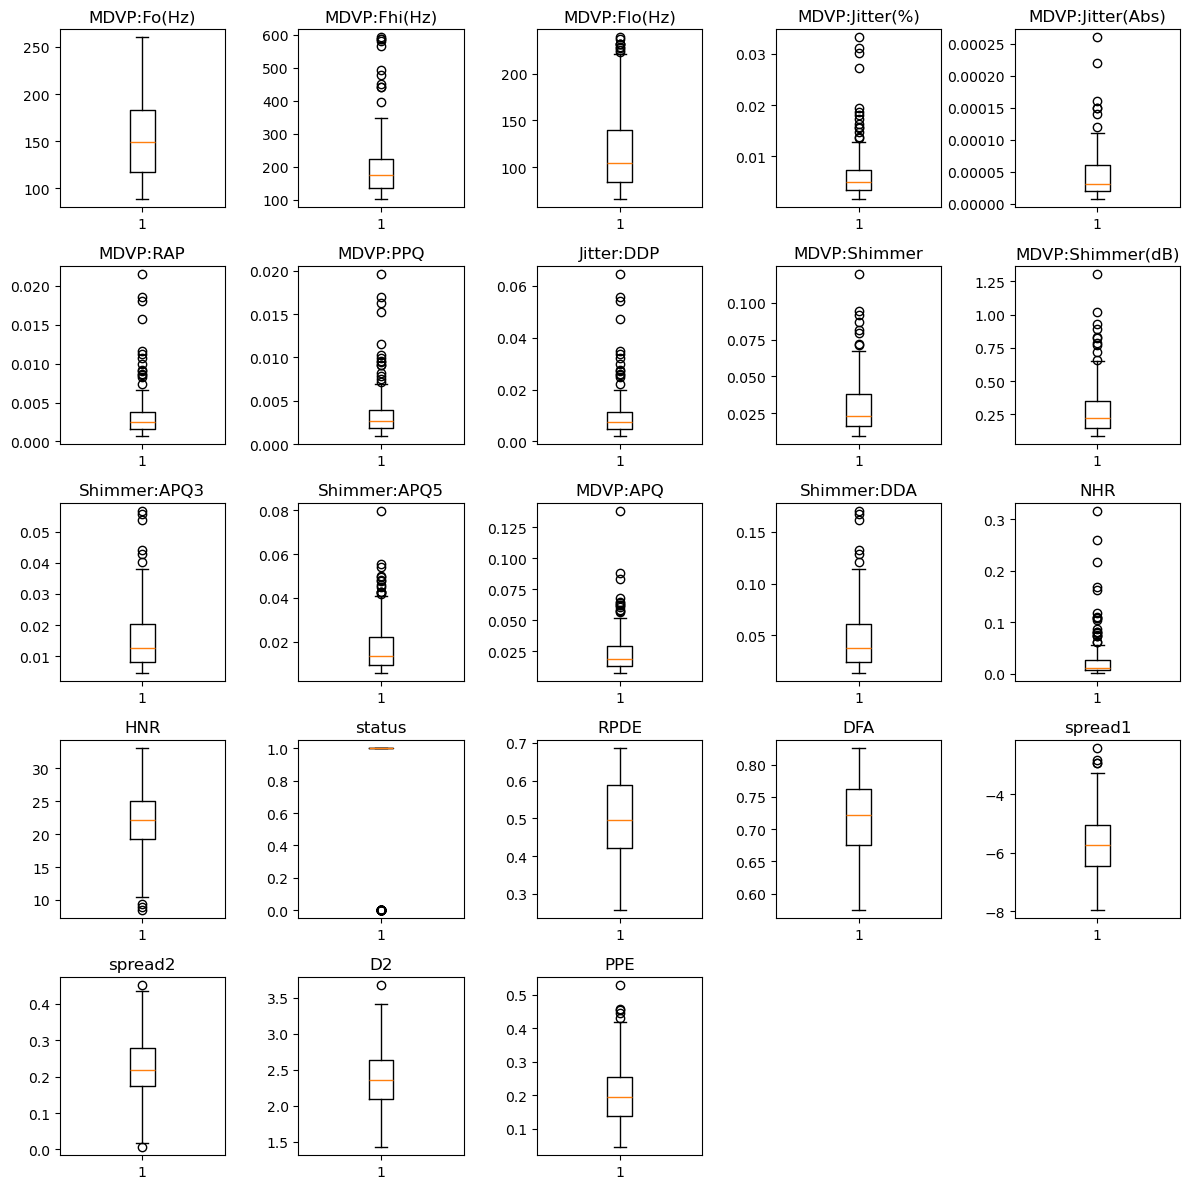

In [123]:
plt.figure(figsize=(12,12))
for ind,col in enumerate(df.columns[1:]):
        plt.subplot(5,5,ind+1)
        plt.boxplot(df[col])
        plt.title(col)


plt.tight_layout()
plt.show()

    Showing outliers in each feature

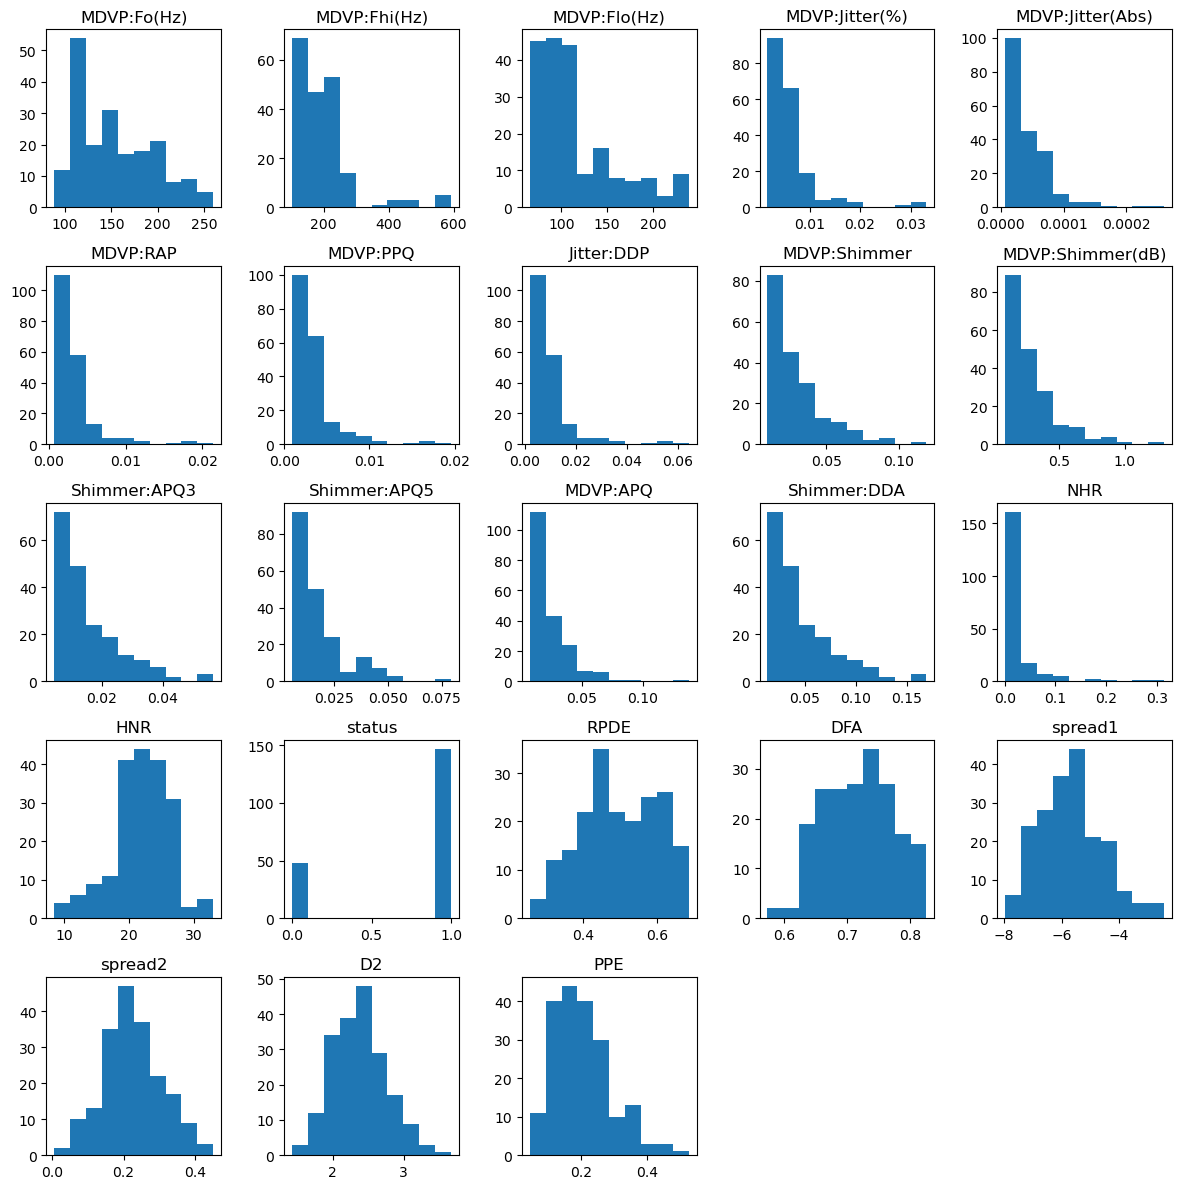

In [267]:
plt.figure(figsize=(12,12))
for ind,col in enumerate(df.columns[1:]):
        plt.subplot(5,5,ind+1)
        plt.hist(df[col])
        plt.title(col)

plt.tight_layout()
plt.show()

In [134]:
print("Target variable class imbalance:")
df["status"].value_counts()

Target variable class imbalance:


status
1    147
0     48
Name: count, dtype: int64

    The class imbalance (i.e., more data from Parkinson's patients than non-Parkinson's) will have to be fixed through oversampling of the lower category.

## Data Visualization

Next perform your first visualizaion:

* For classification: compare histogram every feature between the classes. Lots of examples of this in class.
* For regression: 
    * Define 2 or more class based on value of the regression target.
        * For example: if regression target is between 0 and 1:
            * 0.0-0.25: Class 1
            * 0.25-0.5: Class 2
            * 0.5-0.75: Class 3
            * 0.75-1.0: Class 4
    * Compare histograms of the features between the classes.
        
* Note that for categorical features, often times the information in the histogram could be better presented in a table.    
* Make comments on what features look most promising for ML task.

In [177]:
df1 = df.drop("name",axis=1)
df1.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [263]:
import math
import scipy

def compare_features_binary(d,logscale=False):
    
    df_0=d[(d["status"]==0).to_numpy()]
    df_1=d[(d["status"]==1).to_numpy()]
    
    print("Number of catogory 0:",df_0.shape[0])
    print("Number of catogory 1:",df_1.shape[0])
    
    # Make a grid of plots
    N_Features = d.shape[1]
    N_X= math.ceil(math.sqrt(N_Features))
    N_Y= math.floor(math.sqrt(N_Features))
    if N_X*N_Y<N_Features:
        N_Y+=1

    #print("Found",N_Features,"features. Creating grid of",N_X,"by",N_Y)
    
    # Histogram Features
    plt.figure(figsize=(50,50))

    for i,column in enumerate(df_0.columns):
        KS_test=scipy.stats.kstest(df_0[column],df_1[column]).statistic
        KS_test_str="{KS:.3f}".format(KS=KS_test)
        #print(column,"KS Distribution Similarity Test:", KS_test_str)
        
        plt.subplot(N_X,N_Y,i+1)
        plt.title(KS_test_str)
        if logscale:
            plt.yscale("log")
        plt.hist(df_0[column], bins = 22, histtype="step", color="red",label="0",density=1, linewidth=2, stacked=True)
        plt.hist(df_1[column], bins = 22, histtype="step", color="blue",label="1",density=1, linewidth=2, stacked=True)
        plt.legend()
        plt.xlabel(column,fontsize=25)

        
        
    plt.show()

Number of catogory 0: 48
Number of catogory 1: 147


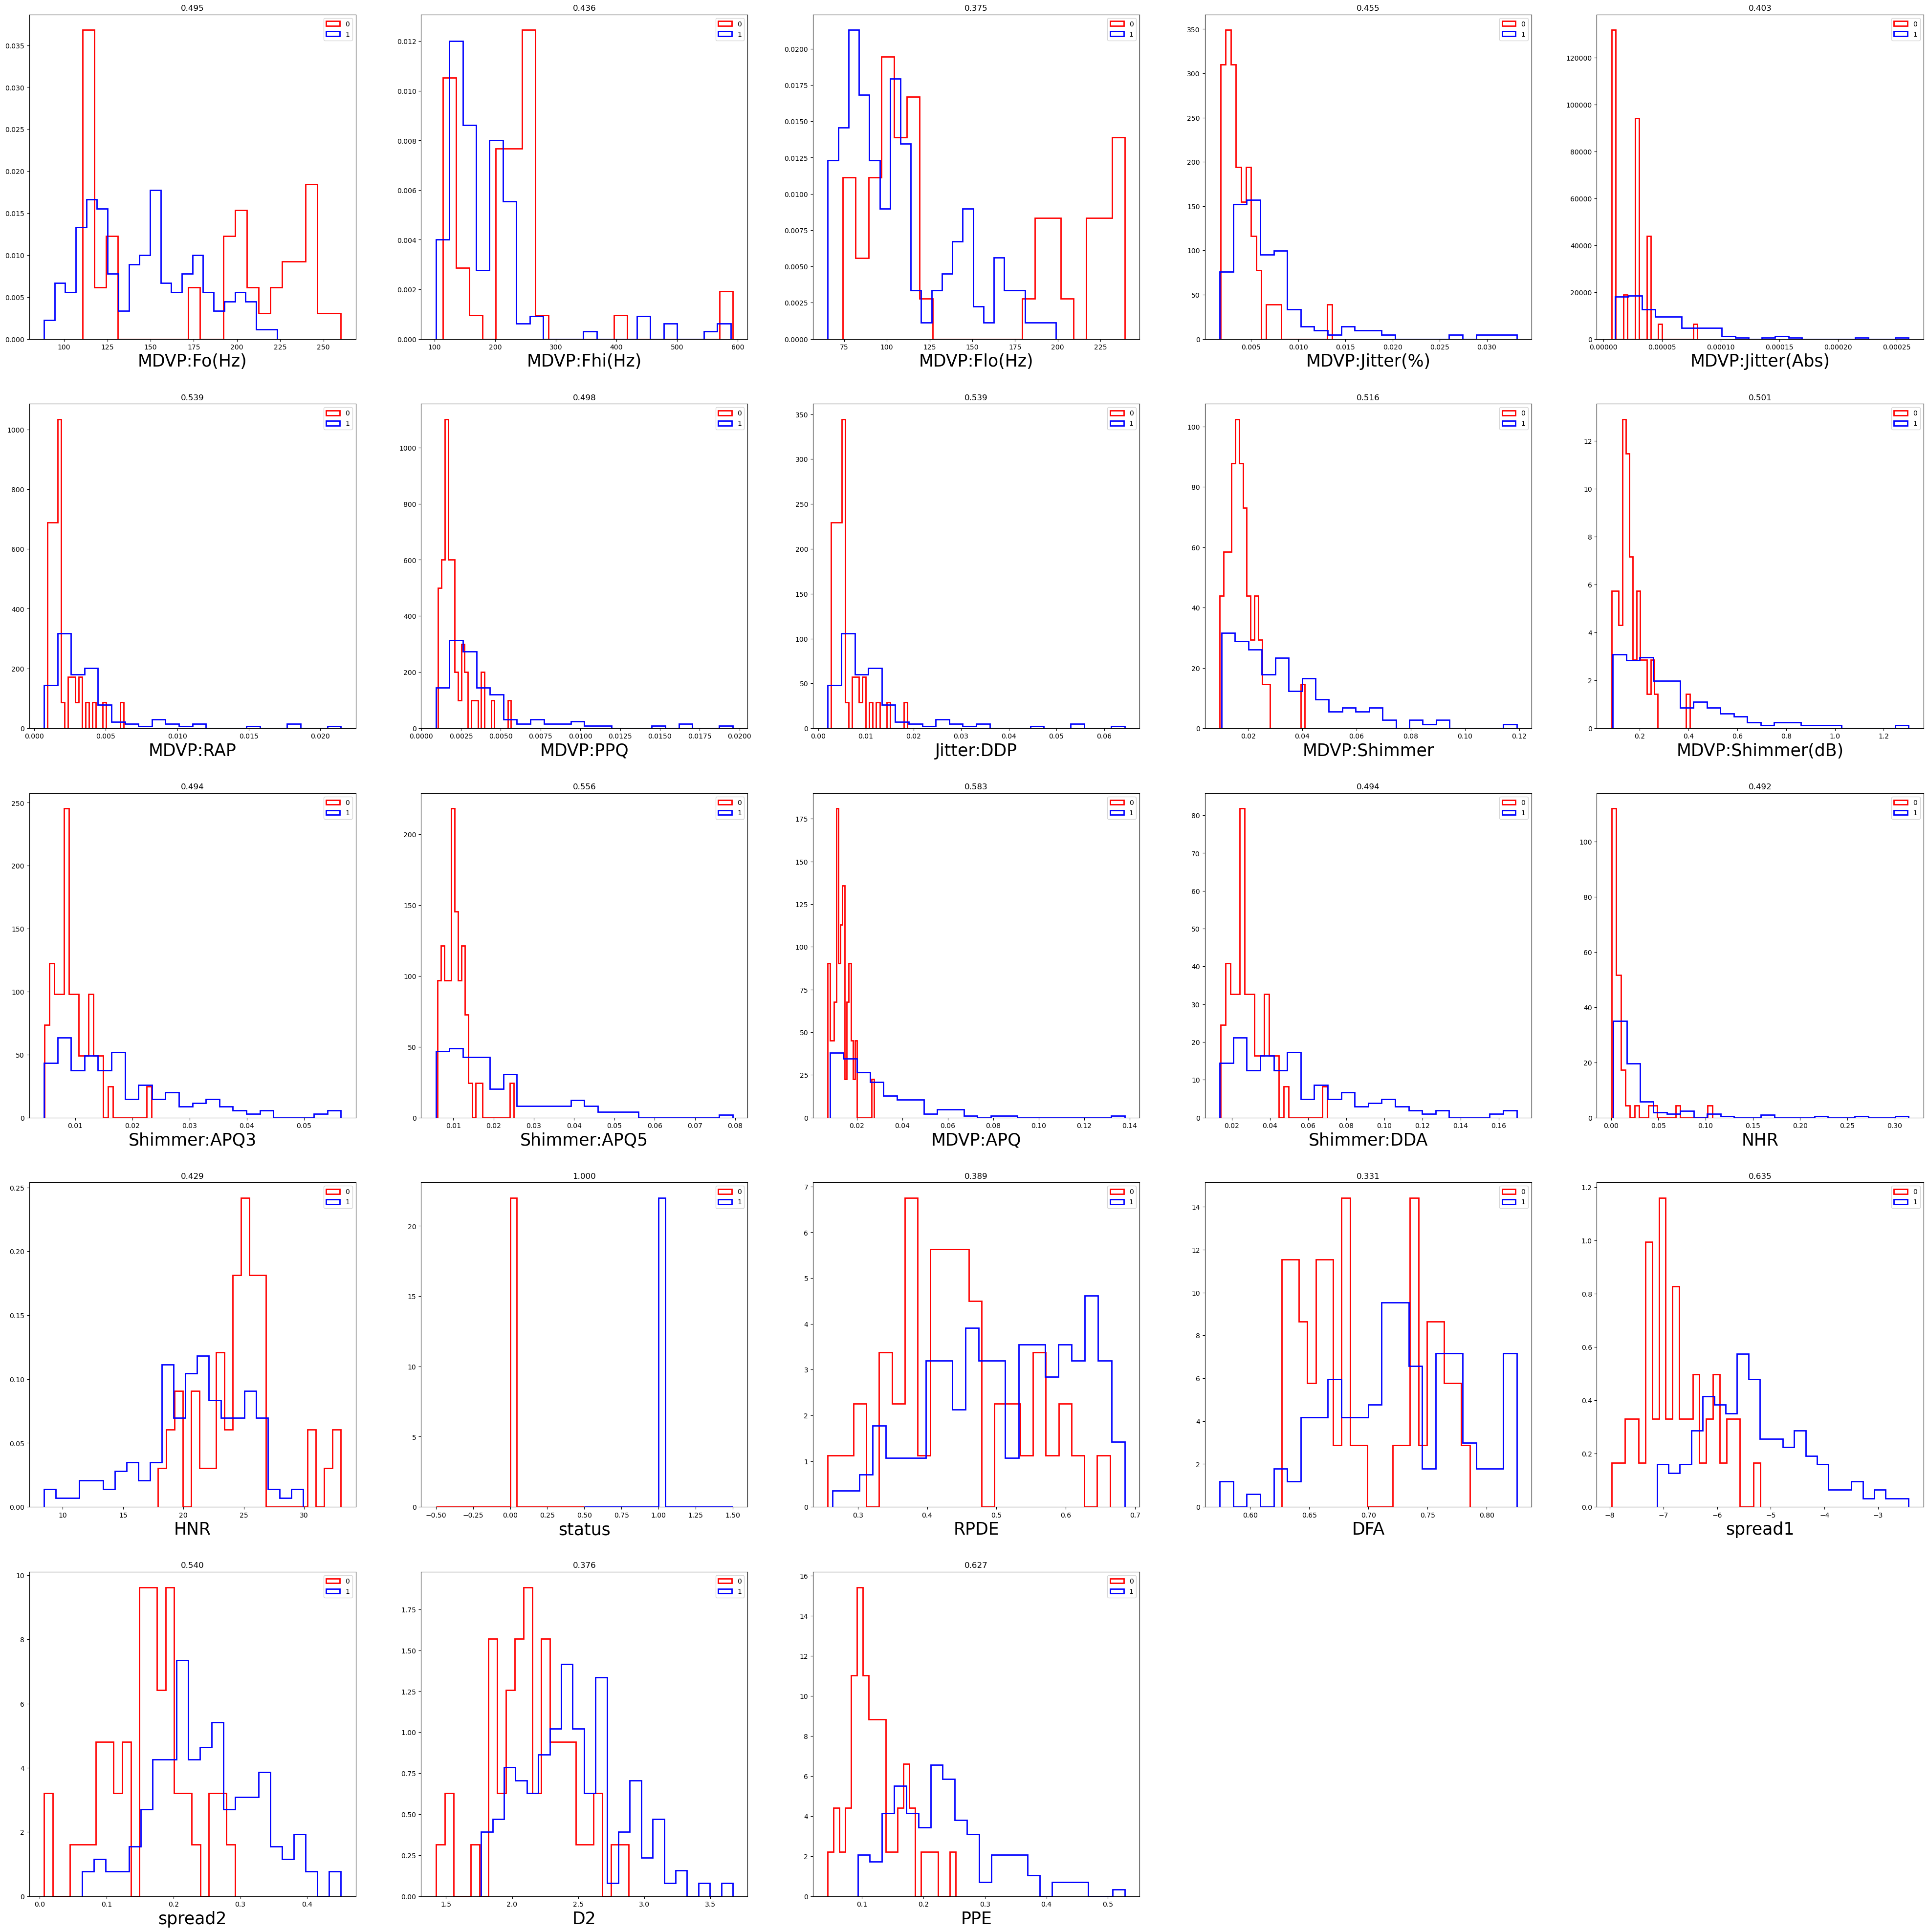

In [265]:
compare_features_binary(df1)

- Features such as `PPE` and `spread1` seem to show differently centered/shaped distribution curves between the two classes (with 0 being a tighter/taller and lower distribution and 1 having a higher mean and exhibiting right skew in both cases). 
- In many features, the Parkinson's class (1) shows a right skewed tail and the non-Parkinson's class (0) shows a taller peak with a lower mean and standard deviation. In features where these diffrences are greater (e.g., `Shimmer:DDA`, `MDVP:Jitter(%)`), 
- Some features, like `DFA` and `MDVP:Fo(Hz)` show a near-bimodal pattern for the 0 class. This could also imply discernment potential.
- In contrast, features with a lot of overlap, such as `RPDE`, are not favorable for differentiating between classes or machine learning.

In [348]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import make_scorer, roc_auc_score, precision_score, confusion_matrix

## Data Cleaning and Preperation for Machine Learning

Based on what you find above, prepare the data for ML.

* Perform any data cleaning. Be clear what are you doing, for what feature. 
* Determinine if rescaling is important for your Machine Learning model.
    * If so select strategy for each feature.
    * Apply rescaling.
* Visualize the features before and after cleaning and rescaling.
* One-hot encode your categorical features.

In [235]:
import seaborn as sns

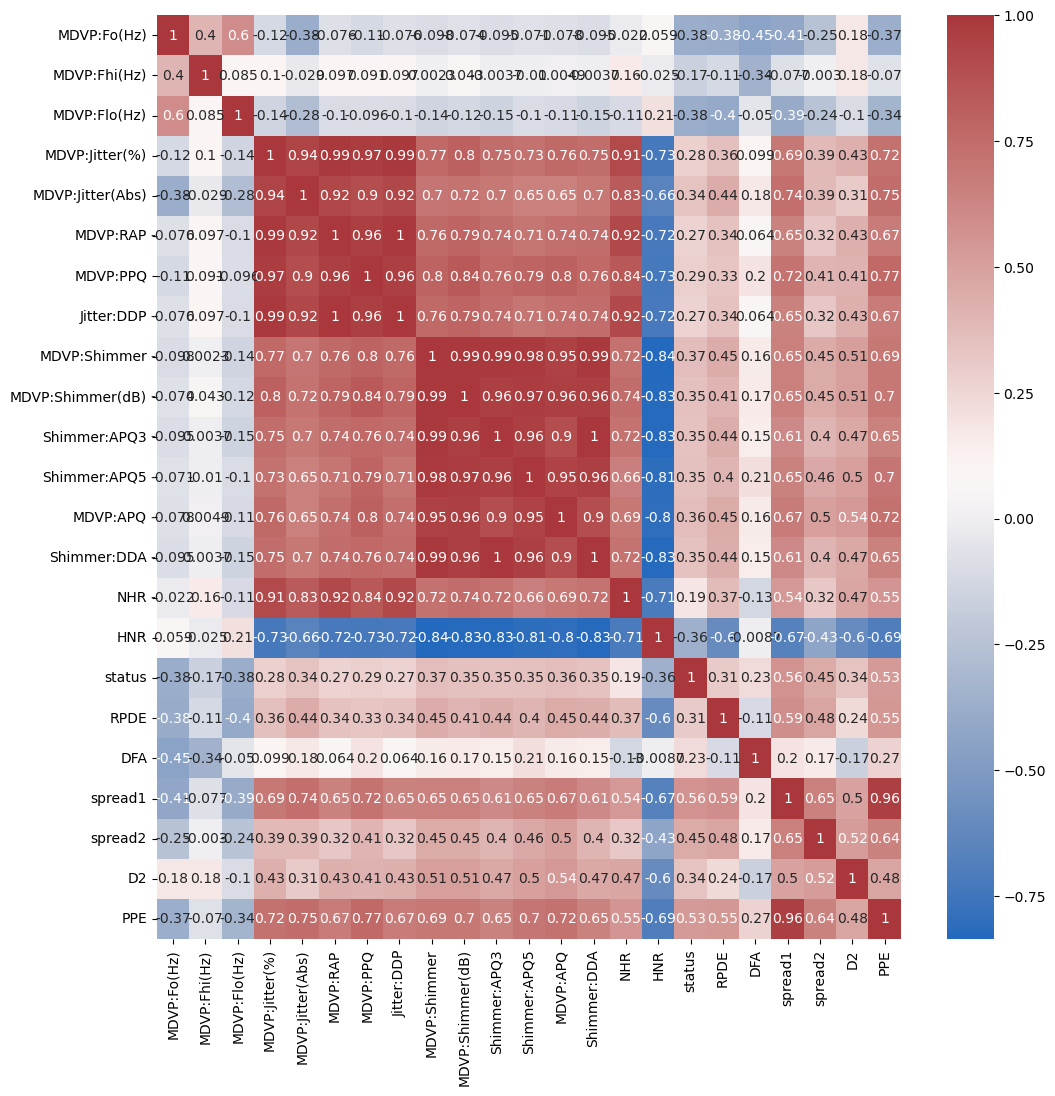

In [275]:
corr = df1.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr,cmap="vlag",annot=True)
plt.show()

    Multiple features show high correlation with each other, indicating multicollinearity. This will be mitigated through feature selection

### Baseline Model

In [297]:
xvars = ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE']

In [305]:
x=df1[xvars].values 
y=df1["status"].values #target variable

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0) 

Precision: 0.9259259259259259 
ROC-AUC: 0.8310344827586207


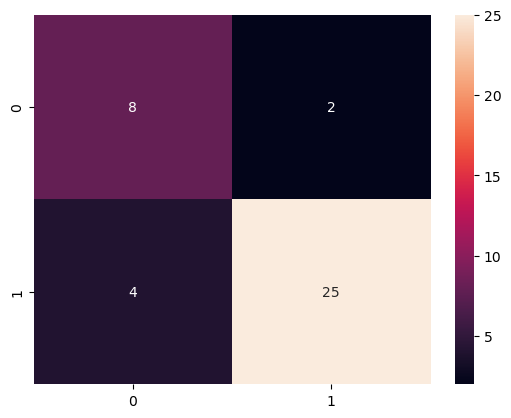

In [332]:
dt_baseline = DecisionTreeClassifier()
dt_baseline.fit(x_train,y_train)

y_hat = dt_baseline.predict(x_test)

#Metrics
precision=precision_score(y_test,y_hat)
roc=roc_auc_score(y_test,y_hat)
print("Precision:",precision,"\nROC-AUC:",roc)


sns.heatmap(confusion_matrix(y_test,y_hat),annot=True)
plt.show()

In [336]:
metrics = [{"Model": "Baseline",
           "Precision":precision,
           "ROC-AUC": roc}]

    Baseline model shows heavy overfitting of the data, which is expected of small datasets and also likely influenced by the multicollinearity of many of the features.

#### Oversampling

In [325]:
df1["status"].value_counts()

status
1    147
0     48
Name: count, dtype: int64

In [327]:
oversample = pd.concat([ df1[df1["status"]==0], df1[df1["status"]==0] ], axis=0, ignore_index=True)

oversample["status"].value_counts()

status
0    96
Name: count, dtype: int64

In [329]:
df = pd.concat([df1,oversample], axis=0, ignore_index=True)

df["status"].value_counts()

status
1    147
0    144
Name: count, dtype: int64

In [354]:
df.shape

(291, 23)

#### Normalization/Scaling

    Since I plan on using relatively simple tree-based models (e.g., decision tree, random forest), scaling and normalizing the distributions of the data isn't necessarily fruitful. Still, I will be using min-max scaler on the data, since it is non-normal and there aren't any extreme outliers.

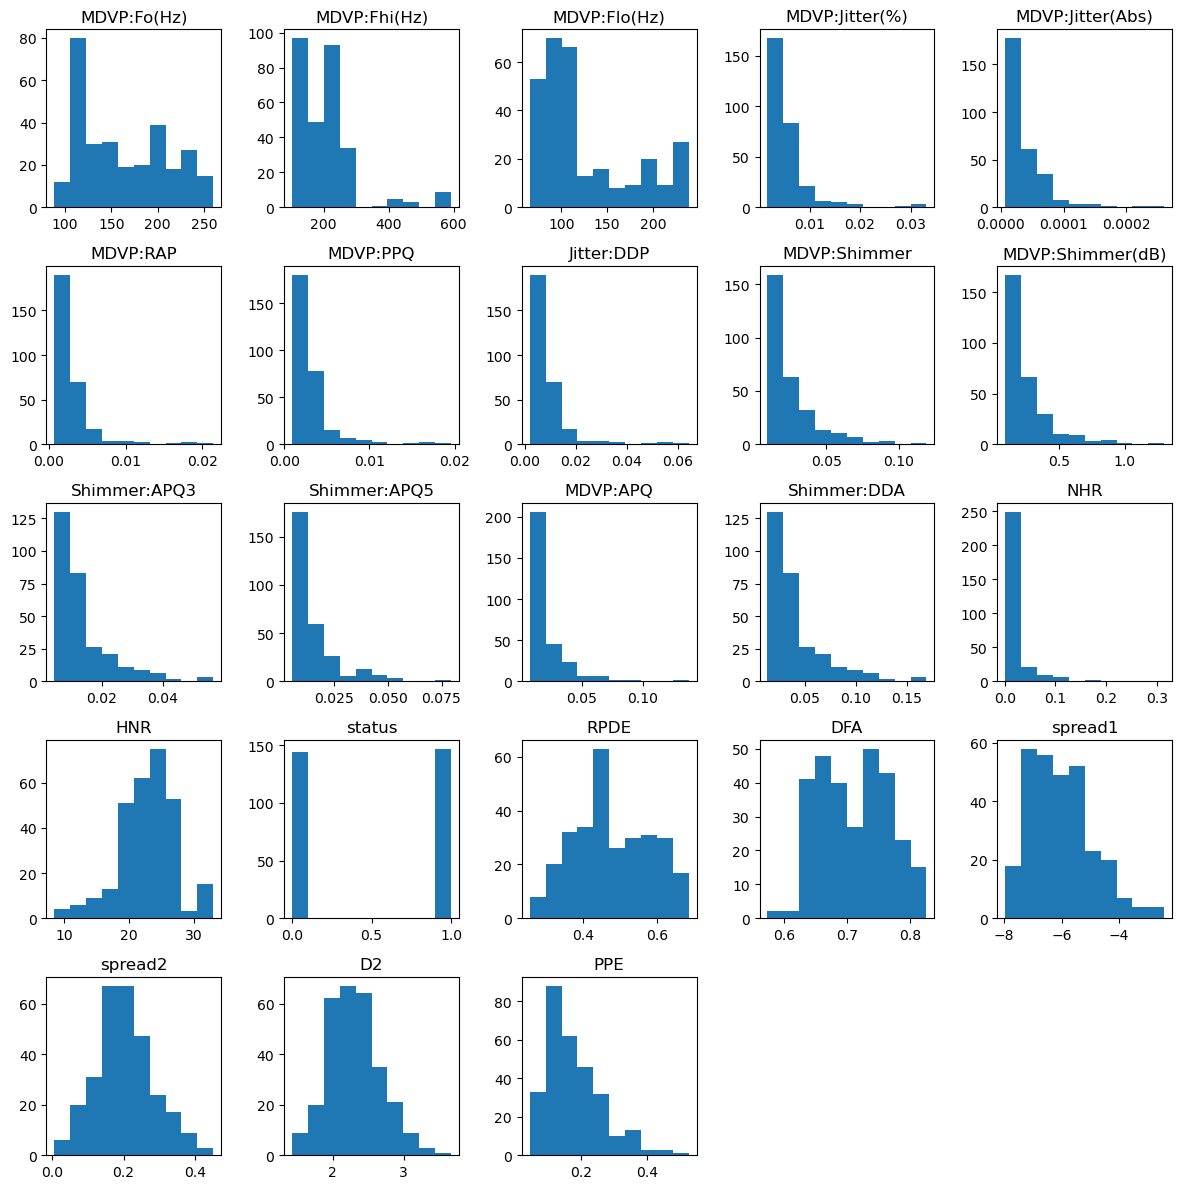

In [346]:
plt.figure(figsize=(12,12))
for ind,col in enumerate(df.columns):
        plt.subplot(5,5,ind+1)
        plt.hist(df[col])
        plt.title(col)

plt.tight_layout()
plt.show()

In [352]:
from sklearn.preprocessing import MinMaxScaler

In [356]:
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns = df.columns)

scaled_df.shape

(291, 23)

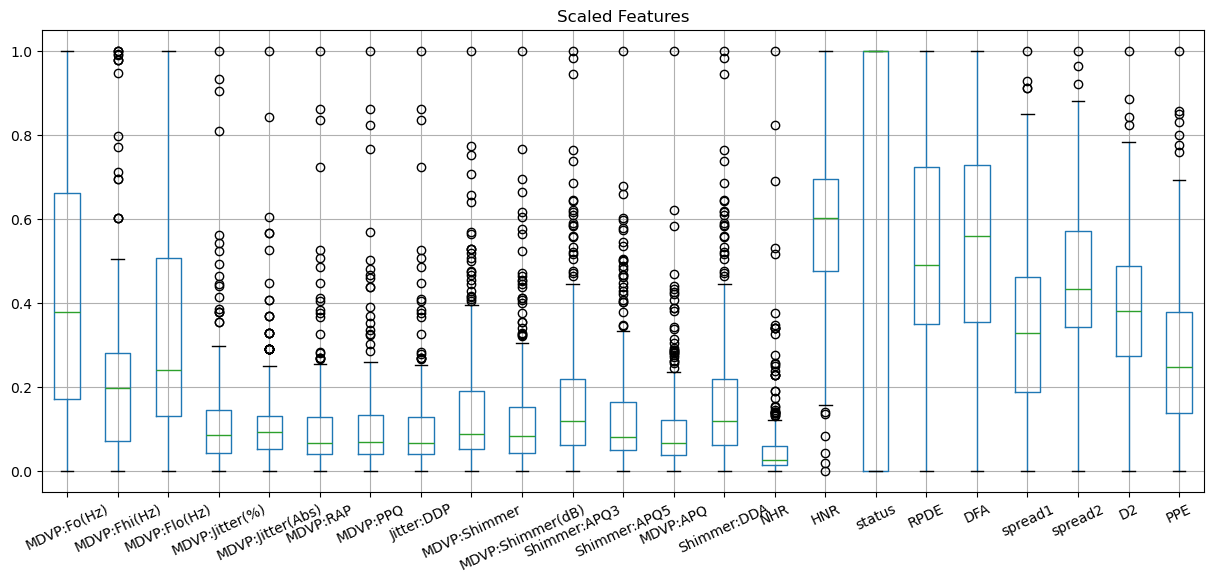

In [370]:
plt.figure(figsize=(15,6))
scaled_df.boxplot()
plt.xticks(rotation=25)
plt.title("Scaled Features")
plt.show()

In [380]:
### DATA CLEANING STEPS:

module = """
import pandas as pd

def remove_name_col(df, col="name"):
    df = df.drop(col,axis=1)
    return df

def balance_classes(df):
    oversample = pd.concat([ df[df["status"]==0], df[df["status"]==0] ], axis=0, ignore_index=True)
    df1 = pd.concat([df,oversample], axis=0, ignore_index=True)
    return df1

def minmax_scaling(df):
    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler()
    scaled_df = scaler.fit_transform(df)
    scaled_df = pd.DataFrame(scaled_df, columns = df.columns)
    return scaled_df

def preprocess(df):
    df = remove_name_col(df)
    df = balance_classes(df)
    df = minmax_scaling(df)
    return df
"""

#with open("tabular_processing.py", "w") as f:
#    f.write(module)